# Домашнее задание №2. Дескриптивный анализ данных

**Цель работы**: приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python

## Вариант

In [3]:
surname = "Шегай"  # Ваша фамилия

if not surname:
    raise Exception('Необходимо указать фамилию!')

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
VARIANT =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1 - вариант: ", VARIANT % 5 + 1)
print("задача № 2 - вариант: ", VARIANT % 4 + 1)

Задача № 1 - вариант:  2
задача № 2 - вариант:  1


# Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)

## Вариант 2


Импортируем библиотеки `pandas` и `matplotlib`. Добавляем датафрейм `DF_WGI` со всей информацией с листа `ControlofCorruption` из файла `data/wgidataset.xlsx`. Создаем новый датафрейм `DF_SORTED`, с теми же данными, что в предыдущем датафрейме, но отсортированными по убыванию индекса. Индексация начинается с 1.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

DF_WGI = pd.DataFrame(pd.read_excel('data/wgidataset.xlsx', sheet_name='ControlofCorruption', header=[0,1], skiprows=13))
DF_SORTED = DF_WGI.sort_index(ascending=False)
DF_SORTED

Basic           1996                                         \
    Country/Territory Code  Estimate    StdErr NumSrc       Rank      Lower   
213          Zimbabwe  ZWE -0.278847  0.244907    5.0  47.849461  30.645161   
212            Zambia  ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
211  Congo, Dem. Rep.  ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
210      South Africa  ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
209            Serbia  SRB -1.140072  0.262077    4.0  11.827957   0.537634   
..                ...  ...       ...       ...    ...        ...        ...   
4            Anguilla  AIA       NaN       NaN    NaN        NaN        NaN   
3              Angola  AGO -1.167702  0.262077    4.0   9.677420   0.537634   
2         Afghanistan  AFG -1.291705  0.340507    2.0   4.301075   0.000000   
1             Andorra  ADO  1.318143  0.480889    1.0  87.096771  72.043015   
0               Aruba  ABW       NaN       NaN    NaN        NaN        NaN   

                    1998            ...   2021                        \
         Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
213  60.752689 -0.504802  0.198134  ...   12.0  10.000000   4.285714   
212  41.397850 -0.853156  0.227055  ...   12.0  25.714285  17.619047   
211  12.365591 -1.416679  0.310343  ...   11.0   4.285714   0.000000   
210  81.182793  0.638809  0.188628  ...   11.0  53.809525  46.190475   
209  29.032259 -1.195605  0.191027  ...    9.0  35.714287  26.190475   
..         ...       ...       ...  ...    ...        ...        ...   
4          NaN       NaN       NaN  ...    1.0  73.333336  50.952381   
3    27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
2    27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
1    96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
0          NaN       NaN       NaN  ...    2.0  78.571426  62.857143   

                    2022                                                    
         Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
213  17.619047 -1.255139  0.151262   12.0   8.490566   4.245283  17.924528  
212  33.809525 -0.529200  0.152557   12.0  34.433964  23.584906  45.754719  
211   6.666667 -1.544474  0.149016   12.0   3.301887   0.471698   7.075472  
210  60.000000 -0.319765  0.157883   11.0  44.811321  31.603773  52.358490  
209  48.095238 -0.456188  0.158030    9.0  35.377357  24.528301  48.113209  
..         ...       ...       ...    ...        ...        ...        ...  
4    89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
3    40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
2    20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
1    96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
0    89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  

[214 rows x 146 columns]

Создадим датафрейм `RANK_2022`, в котором будет храниться процентильный рейтинг среди всех стран за 2022й год. Для удобства отсортируем его по убыванию значений.

In [5]:
RANK_2022 = DF_WGI.filter(items=[('Basic', 'Country/Territory'), (2022, 'Rank')], axis=1).dropna(subset=[(2022, 'Rank')])
RANK_2022 = RANK_2022.sort_values((2022, 'Rank'), ascending=True)
RANK_2022

,Basic,2022
,Country/Territory,Rank
32,South Sudan,0.000000
174,Somalia,0.471698
182,Syrian Arab Republic,0.943396
208,"Yemen, Rep.",1.415094
202,"Venezuela, RB",1.886792
...,...,...
144,Norway,98.113205
169,Singapore,98.584908
147,New Zealand,99.056602


Потстроим график на основе полученных данных.

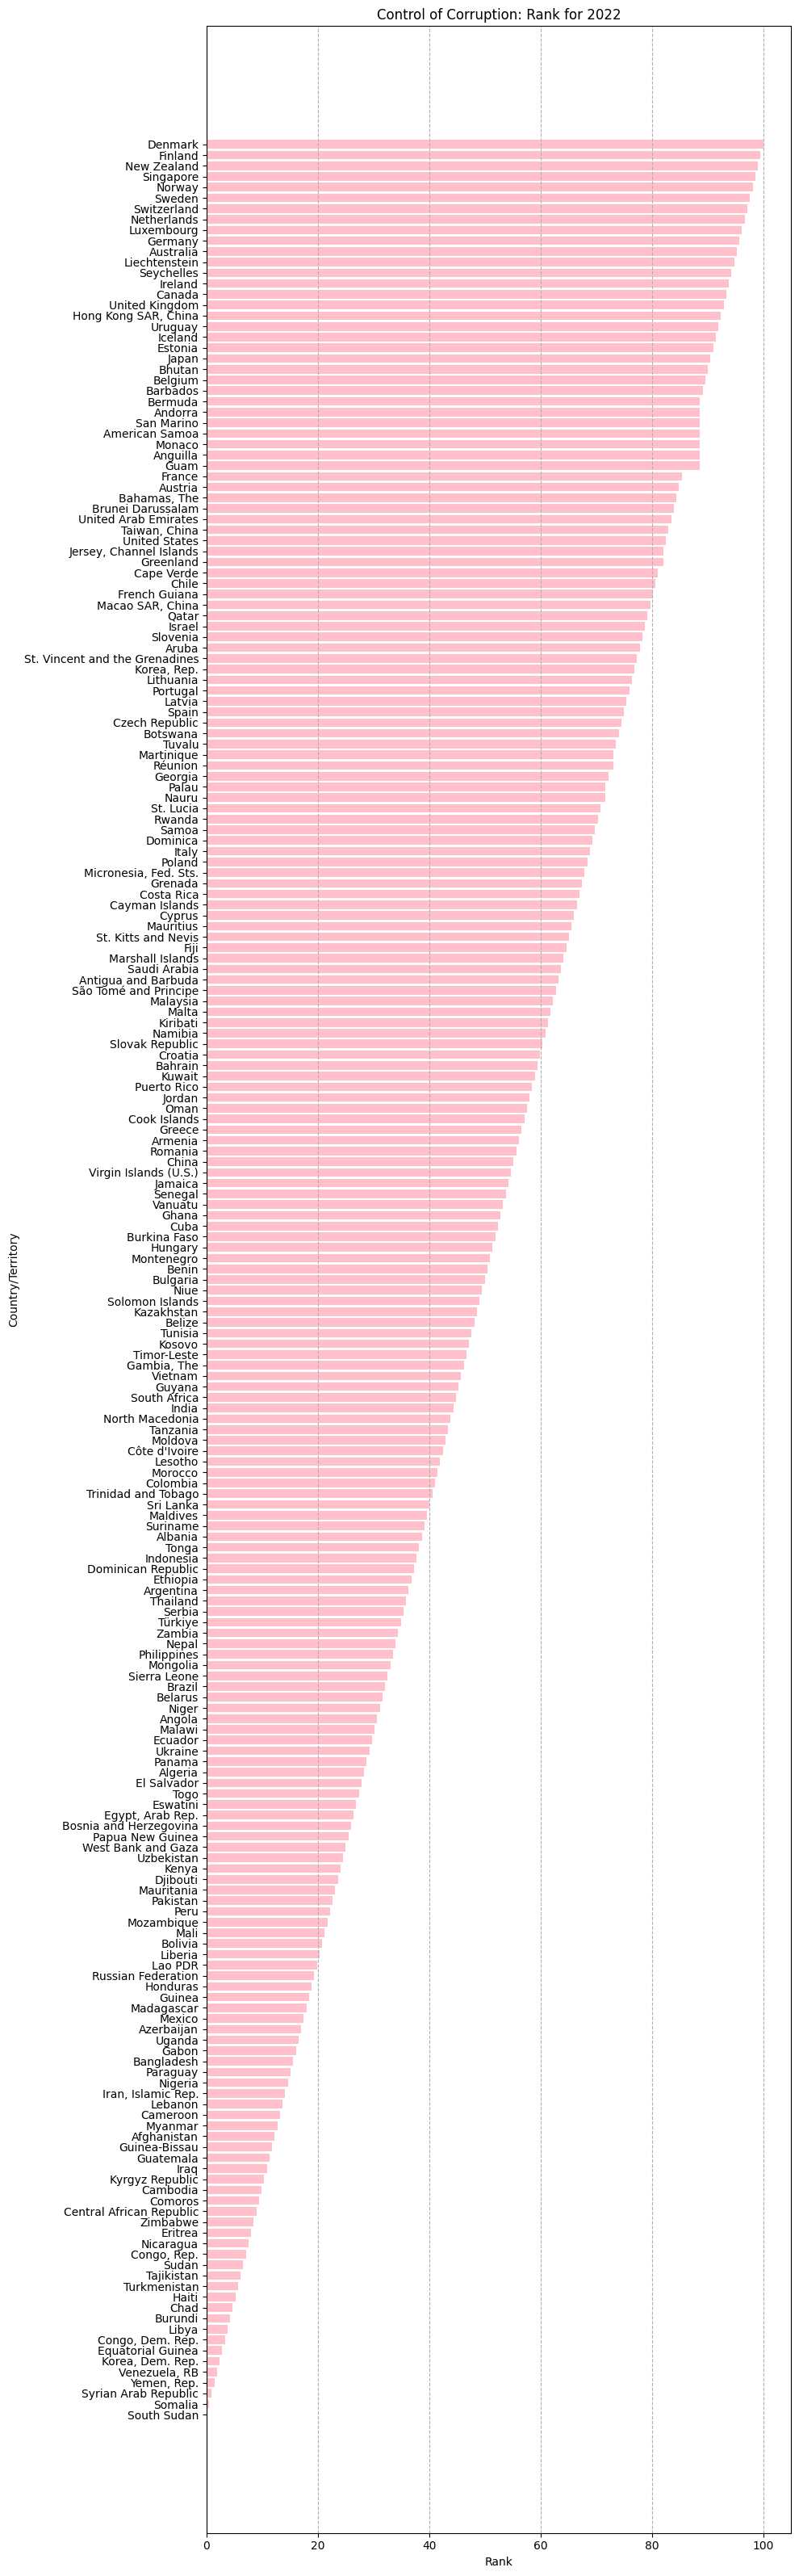

In [6]:
plt.figure(figsize=(10, 32))
plt.barh(RANK_2022[('Basic', 'Country/Territory')], RANK_2022[(2022, 'Rank')], color='pink')
plt.xlabel('Rank')
plt.ylabel('Country/Territory')
plt.title('Control of Corruption: Rank for 2022')
plt.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Создадим датафрейм `REGIONS` со всей информацией из файла `data/regions.xlsx`. Создадим еще один датафрейм `GOD_BLESS_AMERICA`, в котором содержатся только страны, принадлежащие региону `AME`.

In [7]:
REGIONS = pd.DataFrame(pd.read_excel('data/regions.xlsx'))
GOD_BLESS_AMERICA = REGIONS[REGIONS['Region']=='AME']
GOD_BLESS_AMERICA

,Country,Code,Region
4,Argentina,ARG,AME
9,Bahamas,BHS,AME
12,Barbados,BRB,AME
17,Bolivia,BOL,AME
20,Brazil,BRA,AME
27,Canada,CAN,AME
30,Chile,CHL,AME
32,Colombia,COL,AME
35,Costa Rica,CRI,AME
38,Cuba,CUB,AME


Создадим искомый датафрейм `DF_REGION`, содержащий информацию из `DF_WGI` исключительно для стран региона `AME`. Для этого поочередно будем проверять наличие кода страны в `GOD_BLESS_AMERICA`, в случае отсутствия - удаляем его. Выведем полученный датафрейм.

In [8]:
DF_REGION = DF_WGI
for code in DF_WGI[('Basic', 'Code')]:
    if code not in GOD_BLESS_AMERICA['Code'].tolist():
        DF_REGION = DF_REGION[DF_REGION[('Basic', 'Code')] != code]

DF_REGION

Basic           1996                   \
                  Country/Territory Code  Estimate    StdErr NumSrc   
8                         Argentina  ARG -0.101317  0.210325    6.0   
22                     Bahamas, The  BHS  1.156810  0.418145    2.0   
27                          Bolivia  BOL -0.824829  0.262077    4.0   
28                           Brazil  BRA -0.018580  0.210325    6.0   
29                         Barbados  BRB  1.542726  0.340507    2.0   
35                           Canada  CAN  2.031408  0.210325    6.0   
37                            Chile  CHL  1.454119  0.210325    6.0   
43                         Colombia  COL -0.512254  0.210325    6.0   
46                       Costa Rica  CRI  0.696142  0.244907    5.0   
47                             Cuba  CUB  0.289153  0.262077    4.0   
53                         Dominica  DMA  0.869897  0.480889    1.0   
55               Dominican Republic  DOM -0.422995  0.262077    4.0   
57                          Ecuador  ECU -0.684874  0.262077    4.0   
76                          Grenada  GRD  0.869897  0.480889    1.0   
78                        Guatemala  GTM -0.856944  0.244907    5.0   
81                           Guyana  GUY -0.140642  0.315914    3.0   
83                         Honduras  HND -1.078811  0.244907    5.0   
85                            Haiti  HTI -1.173277  0.315914    3.0   
95                          Jamaica  JAM  0.187061  0.262077    4.0   
110                       St. Lucia  LCA       NaN       NaN    NaN   
124                          Mexico  MEX -0.512429  0.210325    6.0   
141                       Nicaragua  NIC -0.564544  0.244907    5.0   
150                          Panama  PAN -0.201106  0.262077    4.0   
152                            Peru  PER -0.398886  0.244907    5.0   
159                        Paraguay  PRY -1.166015  0.262077    4.0   
172                     El Salvador  SLV -0.865278  0.244907    5.0   
176                        Suriname  SUR  0.185647  0.315914    3.0   
190             Trinidad and Tobago  TTO  0.901226  0.262077    4.0   
198                         Uruguay  URY  1.124996  0.262077    4.0   
199                   United States  USA  1.571041  0.210325    6.0   
201  St. Vincent and the Grenadines  VCT       NaN       NaN    NaN   
202                   Venezuela, RB  VEN -0.862947  0.210325    6.0   

                                           1998            ...   2021  \
          Rank      Lower       Upper  Estimate    StdErr  ... NumSrc   
8    53.763439  38.709679   62.903225 -0.203482  0.188628  ...   12.0   
22   83.870964  69.892471   93.010750  1.295374  0.417848  ...    5.0   
27   25.268818   6.451613   41.935482 -0.442392  0.227055  ...   11.0   
28   56.989246  44.086021   63.440861  0.041475  0.188628  ...   12.0   
29   90.860214  81.182793   96.774193  1.541047  0.324013  ...    6.0   
35   96.236557  91.397850  100.000000  2.034210  0.188628  ...    9.0   
37   90.322578  81.182793   93.010750  1.297507  0.188628  ...   12.0   
43   36.559139  23.118280   50.537636 -0.523702  0.188628  ...   12.0   
46   75.268814  63.440861   81.182793  0.756039  0.227055  ...   11.0   
47   63.440861  52.150539   75.806450  0.344617  0.227055  ...    5.0   
53   80.107529  59.139786   91.397850  0.883366  0.453149  ...    3.0   
55   41.397850  23.655914   57.526882 -0.755780  0.227055  ...   11.0   
57   30.107527  12.903226   49.462364 -0.791845  0.227055  ...   10.0   
76   80.107529  59.139786   91.397850  0.883366  0.453149  ...    3.0   
78   23.655914   6.451613   38.709679 -0.866168  0.227055  ...   11.0   
81   52.688171  31.182796   65.053764 -0.352435  0.310343  ...    8.0   
83   14.516129   2.150538   30.645161 -1.015081  0.227055  ...   13.0   
85    9.139785   0.000000   31.182796 -1.166687  0.310343  ...    9.0   
95   61.827957  49.462364   73.118279  0.139226  0.227055  ...    9.0   
110        NaN        NaN         NaN       NaN       NaN  ...    3.0   
124  36.0

Построим график на основе полученных данных.

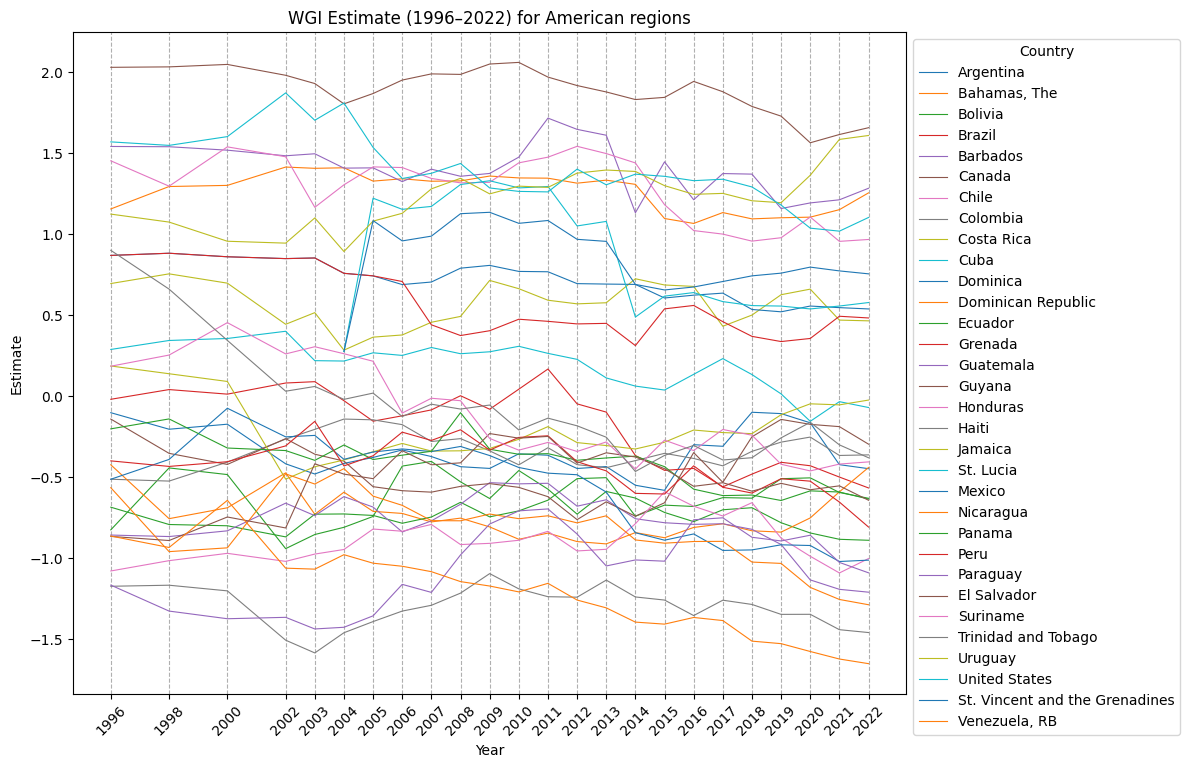

In [9]:
years = [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
ESTIMATES = DF_REGION[[('Basic', 'Country/Territory')] + [(year, 'Estimate') for year in years]]

plt.figure(figsize=(12, 8))
for i, row in ESTIMATES.iterrows():
    country = row[('Basic', 'Country/Territory')]
    plt.plot(years, row.iloc[1:], linewidth=0.8, label=country) 
plt.title('WGI Estimate (1996–2022) for American regions')
plt.xlabel('Year')
plt.xticks(years, rotation=45)
plt.ylabel('Estimate')
plt.grid(True, axis='x', linestyle='--')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Найдем минимальное и максимально значение `Esimate` для региона `AME` и запишем в датафрейм `DF_MINMAX`.

In [10]:
DF_MINMAX = DF_REGION[(DF_REGION[(2022, 'Estimate')] == DF_REGION[(2022, 'Estimate')].max()) + (DF_REGION[(2022, 'Estimate')] == DF_REGION[(2022, 'Estimate')].min())]
DF_MINMAX

Basic           1996                                         \
    Country/Territory Code  Estimate    StdErr NumSrc       Rank      Lower   
35             Canada  CAN  2.031408  0.210325    6.0  96.236557  91.397850   
202     Venezuela, RB  VEN -0.862947  0.210325    6.0  22.580645   7.526882   

                     1998            ...   2021                        \
          Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
35   100.000000  2.034210  0.188628  ...    9.0  92.380951  89.047623   
202   35.483871 -0.933742  0.188628  ...   11.0   1.904762   0.000000   

                    2022                                                   
         Upper  Estimate    StdErr NumSrc       Rank     Lower      Upper  
35   96.190475  1.658580  0.169171    9.0  93.396225  89.15094  96.698112  
202   6.190476 -1.651137  0.161103   10.0   1.886792   0.00000   6.603774  

[2 rows x 146 columns]

Определим среднее значение по параметру `Estimate` за каждый год, и запишем в `S_MEANS`.

In [11]:
S_MEANS = DF_REGION[[(year, 'Estimate') for year in years]].mean(axis=0)
S_MEANS

1996  Estimate    0.083147
1998  Estimate    0.052232
2000  Estimate    0.072905
2002  Estimate    0.018983
2003  Estimate    0.012414
2004  Estimate    0.014755
2005  Estimate    0.063539
2006  Estimate    0.057995
2007  Estimate    0.057827
2008  Estimate    0.087125
2009  Estimate    0.081725
2010  Estimate    0.084752
2011  Estimate    0.100509
2012  Estimate    0.034041
2013  Estimate    0.026238
2014  Estimate   -0.072385
2015  Estimate   -0.068266
2016  Estimate   -0.053258
2017  Estimate   -0.068797
2018  Estimate   -0.078746
2019  Estimate   -0.090376
2020  Estimate   -0.104386
2021  Estimate   -0.137586
2022  Estimate   -0.143640
dtype: float64

Нарисуем график по полученным данным, добавив к нему данные по `Russian Federation`. Также отдельно выделим максимальное, минимальное и срденее значение.

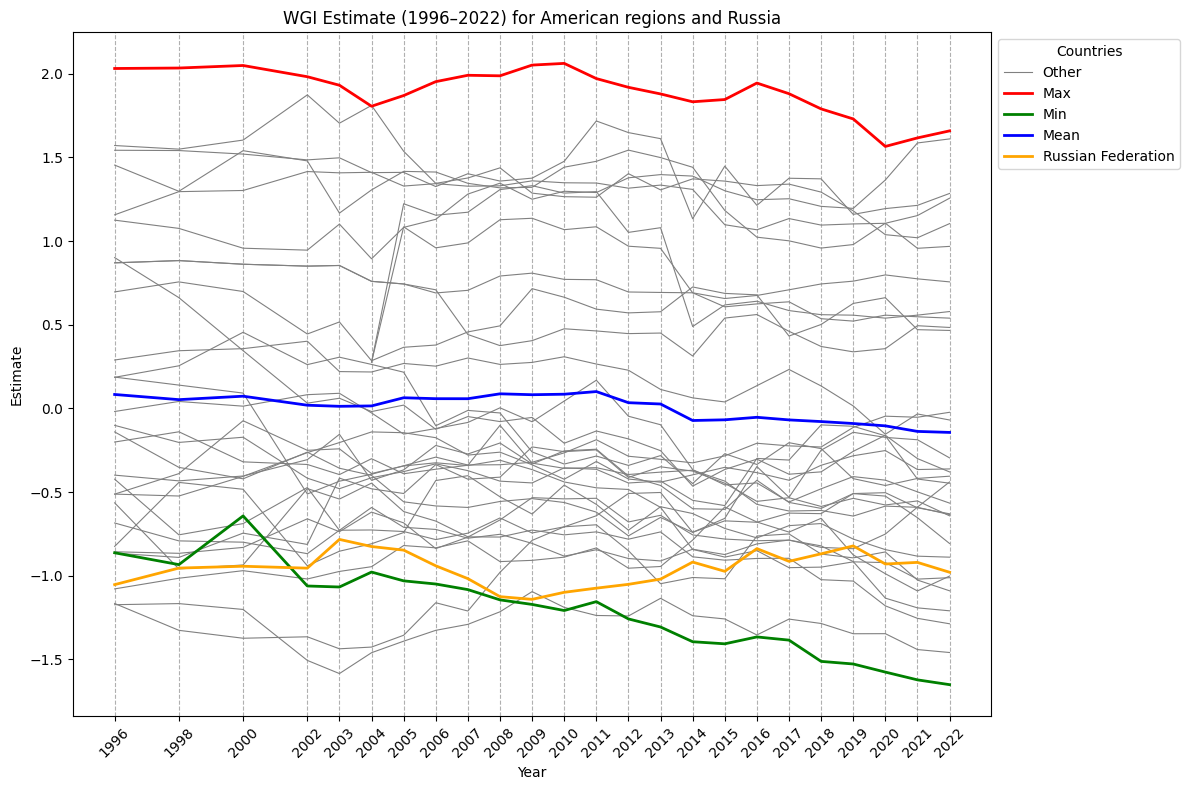

In [21]:
years = [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 
         2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

regional_means = ESTIMATES[[year for year in years]].mean()

max_country = ESTIMATES.loc[ESTIMATES[(2022, 'Estimate')].idxmax(), ('Basic', 'Country/Territory')]
min_country = ESTIMATES.loc[ESTIMATES[(2022, 'Estimate')].idxmin(), ('Basic', 'Country/Territory')]
russia_data = DF_WGI[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation']
russia_estimates = russia_data[[('Basic', 'Country/Territory')] + [(year, 'Estimate') for year in years]]

plt.figure(figsize=(12, 8))
for i, row in ESTIMATES.iterrows():
    country = row[('Basic', 'Country/Territory')]
    if country == DF_MINMAX[('Basic', 'Country/Territory')].tolist()[0]:
        plt.plot(years, row.iloc[1:], linewidth=0.8, color='gray', label='Other')
    else:
        plt.plot(years, row.iloc[1:], linewidth=0.8, color='gray', label=None) 

max_data = ESTIMATES[ESTIMATES[('Basic', 'Country/Territory')] == max_country].iloc[0, 1:]
min_data = ESTIMATES[ESTIMATES[('Basic', 'Country/Territory')] == min_country].iloc[0, 1:]
plt.plot(years, max_data, label='Мах', color='red', linewidth=2)
plt.plot(years, min_data, label='Min', color='green', linewidth=2)
plt.plot(years, S_MEANS, label='Mean', color='blue', linewidth=2)

if not russia_estimates.empty:
    plt.plot(years, russia_estimates.iloc[0, 1:], label='Russian Federation', color='orange', linewidth=2)

plt.title('WGI Estimate (1996–2022) for American regions and Russia')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.grid(True, axis='x', linestyle='--')
plt.xticks(years, rotation=45)
plt.legend(title='Countries', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


Рассмотрим, как изменился показатель 'Rank' с 1996 по 2022.

In [32]:
RANK_1996 = DF_REGION.filter(items=[('Basic', 'Country/Territory'), (1996, 'Rank')], axis=1).dropna(subset=[(1996, 'Rank')])
RANK_DIF = DF_REGION[[('Basic', 'Country/Territory'), (1996, 'Rank'), (2022, 'Rank')]].copy()
RANK_DIF['Difference'] = RANK_DIF[(2022, 'Rank')] - RANK_DIF[(1996, 'Rank')]
RANK_DIF.columns = ['Country', 'Rank 1996', 'Rank 2022', 'Difference']
RANK_DIF

,Country,Rank 1996,Rank 2022,Difference
8,Argentina,53.763439,36.320755,-17.442684
22,"Bahamas, The",83.870964,84.433960,0.562996
27,Bolivia,25.268818,20.754717,-4.514101
28,Brazil,56.989246,32.075470,-24.913776
29,Barbados,90.860214,89.150940,-1.709274
35,Canada,96.236557,93.396225,-2.840332
37,Chile,90.322578,80.660378,-9.662201
43,Colombia,36.559139,41.037735,4.478596
46,Costa Rica,75.268814,66.981133,-8.287682
47,Cuba,63.440861,52.358490,-11.082371


Составим таблицу с информацией о регионе, стране, показателям `Rank` за 1996 и 2022, и посчитаем разницу для стран, являющимися максимумом, средним и минимумом за 2022, и для России.

In [ ]:
MEAN_1996 = DF_REGION[(1996, 'Rank')].mean()
MAX_1996 = RANK_1996.loc[RANK_1996[('Basic', 'Country/Territory')] == max_country].values[0][1]
MIN_1996 = RANK_1996.loc[RANK_1996[('Basic', 'Country/Territory')] == min_country].values[0][1]
RUSSIA_1996 = DF_WGI.loc[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation', (1996, 'Rank')].values[0]

MEAN_2022 = DF_REGION[(2022, 'Rank')].mean()
MAX_2022 = RANK_2022.loc[RANK_2022[('Basic', 'Country/Territory')] == max_country].values[0][1]
MIN_2022 = RANK_2022.loc[RANK_2022[('Basic', 'Country/Territory')] == min_country].values[0][1]
RUSSIA_2022 = DF_WGI.loc[DF_WGI[('Basic', 'Country/Territory')] == 'Russian Federation', (2022, 'Rank')].values[0]

DIF_MEAN = MEAN_2022 - MEAN_1996
DIF_MAX = MAX_2022 - MAX_1996
DIF_MIN = MIN_2022 - MIN_1996
DIF_RUSSIA = RUSSIA_2022 - RUSSIA_1996

RES_TABLE = pd.DataFrame({
    'Region': ['AME', 'AME', 'AME', 'ECA'],
    'Country': ['-', max_country, min_country, 'Russian Federation'],
    'Rank 1996': [MEAN_1996, MAX_1996, MIN_1996, RUSSIA_1996],
    'Rank 2022': [MEAN_2022, MAX_2022, MIN_2022, RUSSIA_2022],
    'Difference': [DIF_MEAN, DIF_MAX, DIF_MIN, DIF_RUSSIA]
}, index=['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'])
RES_TABLE

,Region,Country,Rank 1996,Rank 2022,Difference
mean_2022,AME,-,53.279570,45.592570,-7.686999
max_2022,AME,Canada,96.236557,93.396225,-2.840332
min_2022,AME,"Venezuela, RB",22.580645,1.886792,-20.693852
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


# Задание 2. Анализ рынка акций.

## Вариант 1

Создадим датафрейм `DF_COMPANIES`. Занесем в него данные о ценах закрытия для каждой компании из папки `/data/stock`. В качестве значений индекса используем значения столбца `Date`.

In [ ]:
import os
DF_COMPANIES = pd.DataFrame()

for file in os.listdir('data/stock'):
    company_name = os.path.splitext(file)[0]
    file_path = os.path.join('data/stock', file)
    temp = pd.read_csv(file_path)
    temp.set_index('Date', inplace=True)
    DF_COMPANIES[company_name] = temp['Close']
DF_COMPANIES

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300
2022-06-01,136.720001,89.080002,366.059998,106.209999,42.639999,20.990000,41.669998,108.962997,53.139999,32.779999,...,151.589996,69.870003,18.160000,NaN,93.830002,27.450001,224.473328,83.809998,20.459999,8.6300
2022-07-01,162.509995,110.980003,410.119995,134.949997,45.369999,22.740000,48.630001,116.320000,57.400002,33.389999,...,181.630005,77.839996,19.480000,NaN,113.019997,25.780001,297.149994,84.800003,23.450001,7.8900
2022-08-01,157.220001,113.120003,373.440002,126.769997,44.720001,21.389999,44.130001,108.220001,59.869999,28.709999,...,150.940002,74.150002,23.040001,NaN,108.150002,25.719999,275.609985,69.580002,28.760000,7.1900
2022-09-01,138.199997,105.040001,275.200012,113.000000,40.000000,20.719999,36.810001,95.650002,51.220001,24.920000,...,121.389999,61.070000,23.299999,NaN,86.300003,27.309999,265.250000,69.139999,26.500000,5.5800


Составим корреляционную матрицу на основе данных из датафрейма `DF_COMPANIES`.

In [15]:
DF_CORR = DF_COMPANIES.sort_index(axis=1).corr()
DF_CORR

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,...,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,...,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311
DBX,0.740429,0.332740,0.816359,0.478171,0.496982,1.000000,-0.157363,0.669228,0.402517,-0.177013,...,0.519374,0.667833,0.710191,0.424923,0.525305,0.423136,0.037233,-0.113102,0.595928,0.382992
EBAY,0.115591,0.644140,0.180354,0.434078,0.494938,-0.157363,1.000000,0.375794,0.251066,0.744560,...,0.087027,-0.070414,-0.002757,0.338672,0.296858,-0.149330,0.434899,0.753732,0.085736,0.535223
GOOGL,0.806847,0.780440,0.915440,0.912332,0.600025,0.669228,0.375794,1.000000,0.535473,0.263251,...,0.715287,0.618983,0.640675,0.824313,0.821587,0.322718,0.326662,0.315410,0.737311,0.680658
GTLB,0.282373,0.460602,0.496556,0.690644,0.068856,0.402517,0.251066,0.535473,1.000000,0.094128,...,0.404702,0.138574,0.525458,0.855342,0.540113,0.103614,0.260908,0.310273,0.521399,0.453669
HPQ,0.067074,0.390153,0.081518,0.235247,0.214262,-0.177013,0.744560,0.263251,0.094128,1.000000,...,-0.160502,-0.260316,-0.285950,0.436406,0.005774,-0.443806,0.568231,0.728572,-0.180970,0.378627


Составим диаграмму корреляционной матрицы в виде тепловой карты из библиотеки `seaborn`.

<Axes: >

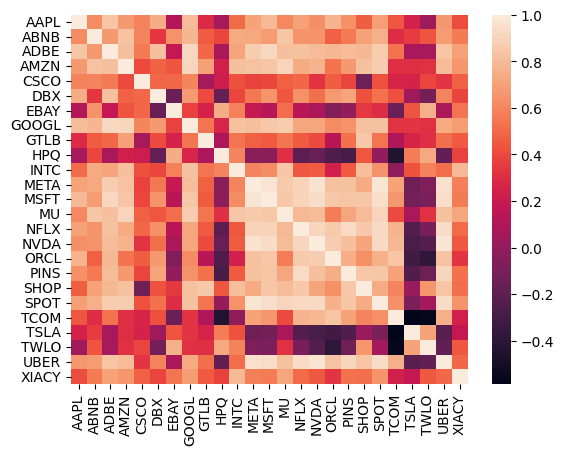

In [16]:
import seaborn as sb
sb.heatmap(DF_CORR, xticklabels=DF_CORR.columns.values, yticklabels=DF_CORR.columns.values)

Определим для акций Apple (AAPL):
- акцию с максимальной положительной корреляцией (max)
- акцию с максимальной отрицательной корреляцией (min)
- акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

Запишем полученные данные в `LST_COMP_CORR`.

In [17]:
DF_APPLE = DF_CORR['AAPL']
APPLE_CORR = DF_APPLE.drop('AAPL')

APPLE_MAX_POS = APPLE_CORR.idxmax()
APPLE_MAX_NEG = APPLE_CORR.idxmin()
APPLE_MIN = APPLE_CORR.abs().idxmin()

LST_COMP_CORR = [APPLE_MAX_POS, APPLE_MAX_NEG, APPLE_MIN]
LST_COMP_CORR

['ADBE', 'TWLO', 'TWLO']

Построим диаграмму разброса для сравнения компании Apple (AAPL) с полученными в предыдущем задании.

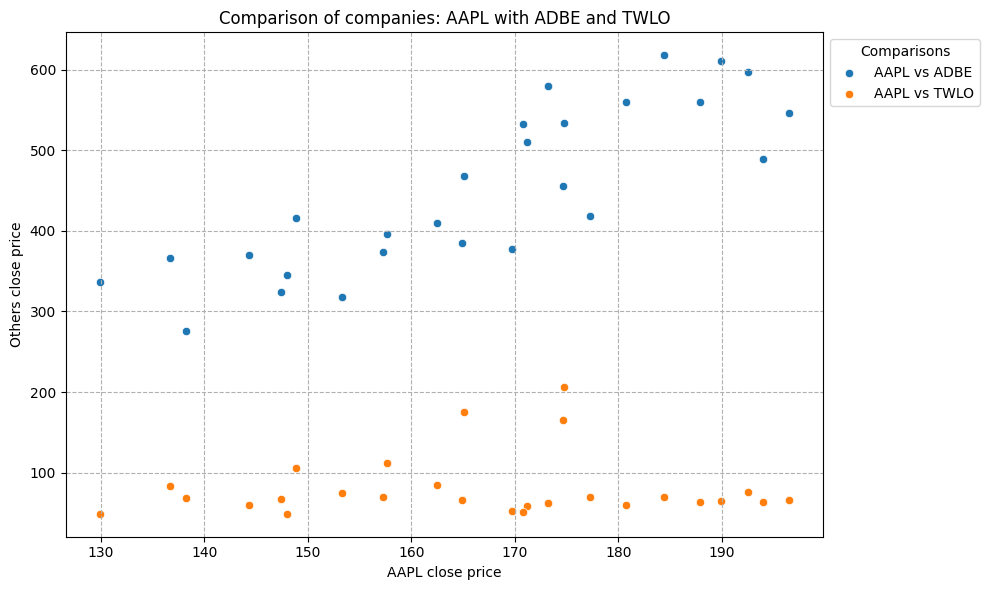

In [18]:
plt.figure(figsize=(10, 6))

companies = ['AAPL', 'ADBE', 'TWLO']
for company in companies[1:]:
    sb.scatterplot(x=DF_COMPANIES['AAPL'], y=DF_COMPANIES[company], label=f'AAPL vs {company}')

plt.title('Comparison of companies: AAPL with ADBE and TWLO')
plt.xlabel('AAPL close price')
plt.ylabel('Others close price')
plt.legend(title='Comparisons', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.show()


Найдем среднее значение за каждый месяц и запишем в `S_MEANS_COMP`.

In [19]:
S_MEANS_COMP = DF_COMPANIES.mean(axis=1)
S_MEANS_COMP

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
dtype: float64

Построим график для акций из `LST_COMP_CORR` и среднего.

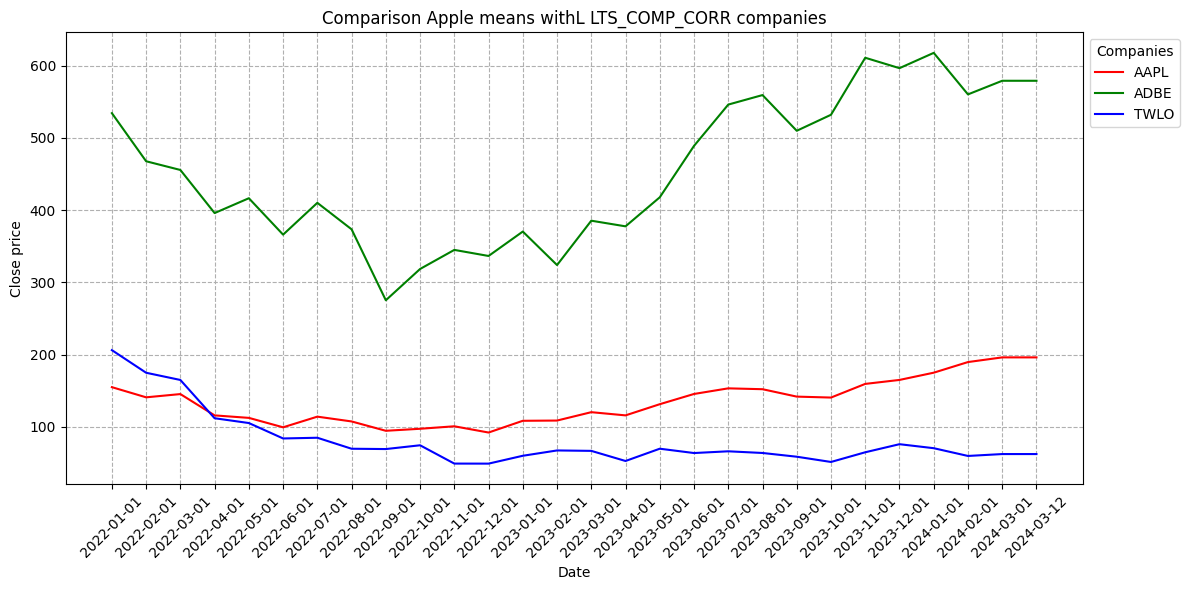

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(S_MEANS_COMP.index, S_MEANS_COMP, label='AAPL', color='red')
plt.plot(DF_COMPANIES.index, DF_COMPANIES[LST_COMP_CORR[0]], label=f'{LST_COMP_CORR[0]}', color='green')
plt.plot(DF_COMPANIES.index, DF_COMPANIES[LST_COMP_CORR[2]], label=f'{LST_COMP_CORR[2]}', color='blue')
plt.grid(True, which='both', linestyle='--')

plt.title('Comparison Apple means withL LTS_COMP_CORR companies')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(title='Companies', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Вывод:** приобрели опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.